In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
dataset = ['https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_doripenem_PA.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_clindamycin_CJ.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_doripenem_EcS.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_doripenem_KN.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_ertapenem_EcS.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_ertapenem_KN.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_imipenem_EcS.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_imipenem_KN.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_kanamycin_SE.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_meropenem_EcS.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_meropenem_KN.csv',
          'https://raw.githubusercontent.com/safaet/antimicrobial_resistance/main/Data/Read%20Data/amr_ast_streptomycin_SE.csv']

In [64]:
df = pd.read_csv(dataset[4])

In [65]:
X = df.iloc[:,1:]
y = df.pop('ertapenem')

In [66]:
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
xgb_model = XGBClassifier(random_state=42)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = VotingClassifier(
    estimators=[
        ('log_reg', log_reg_model),
        ('gb', gb_model),
        ('nn', nn_model),
        ('xgb', xgb_model)
    ],
    voting='soft')
model.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(max_iter=1000,
                                                 random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('nn',
                              MLPClassifier(hidden_layer_sizes=(64, 32),
                                            max_iter=1000, random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=No...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft')

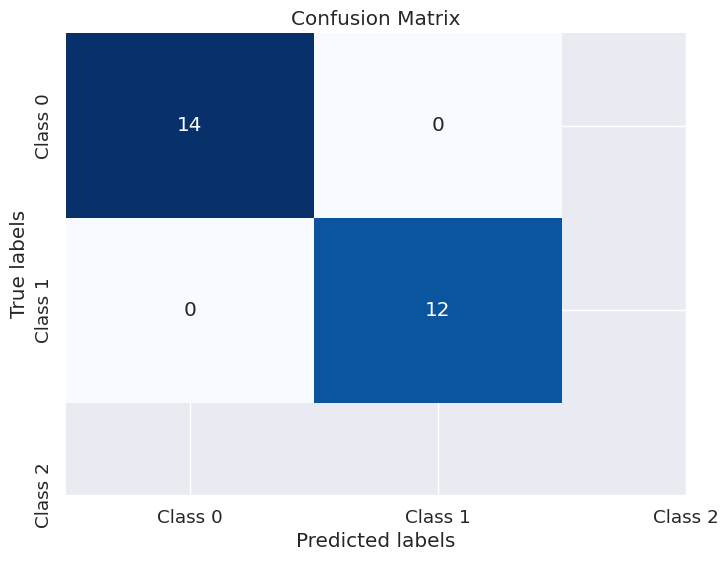

In [68]:
# Predict labels on the test set
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [69]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

In [57]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [75]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

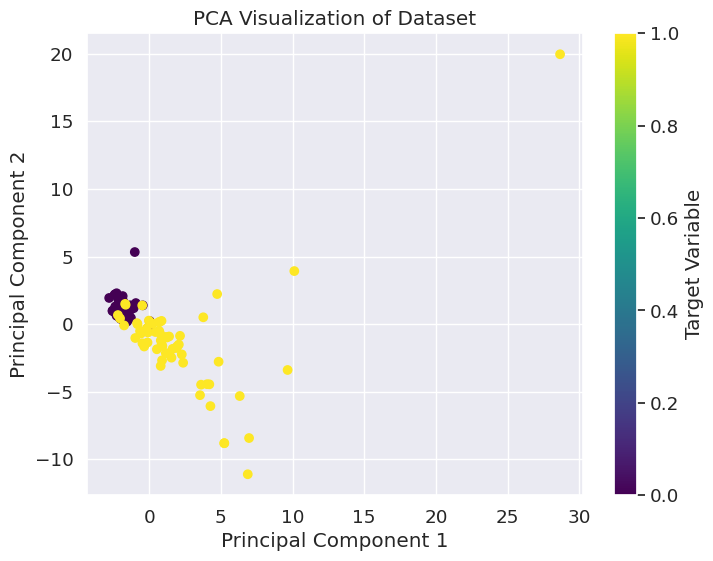

In [76]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # Replace 'c=y' with 'c=None' if no target variable is available
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Dataset')
plt.colorbar(label='Target Variable')  # Replace 'Target Variable' with the name of your target variable if applicable
plt.grid(True)
plt.show()

In [77]:
dataset2_feat_path = "https://raw.githubusercontent.com/DaneshMoradigaravand/PanPred/master/test_data/curated_input_GY.csv"
dataset2_class_path = "https://raw.githubusercontent.com/DaneshMoradigaravand/PanPred/master/test_data/Metadata.csv"

In [83]:
def read_dataset2_v2(antiB_name = 'CTZ'):
  df = pd.read_csv(dataset2_feat_path)
  dfy = pd.read_csv(dataset2_class_path)

  df[antiB_name] = dfy[antiB_name].to_frame()
  rows_with_missing = df[df[antiB_name].isna()].index
  df = df.drop(list(rows_with_missing))

  # Getting Prediction column
  y = df.pop(df.columns[-1])
  # Getting features
  X = df.iloc[:, 3:]
  y.replace({'S': 0, 'R': 1}, inplace = True)
  return df, X, y

In [84]:
df, X, y = read_dataset2_v2('AMP')

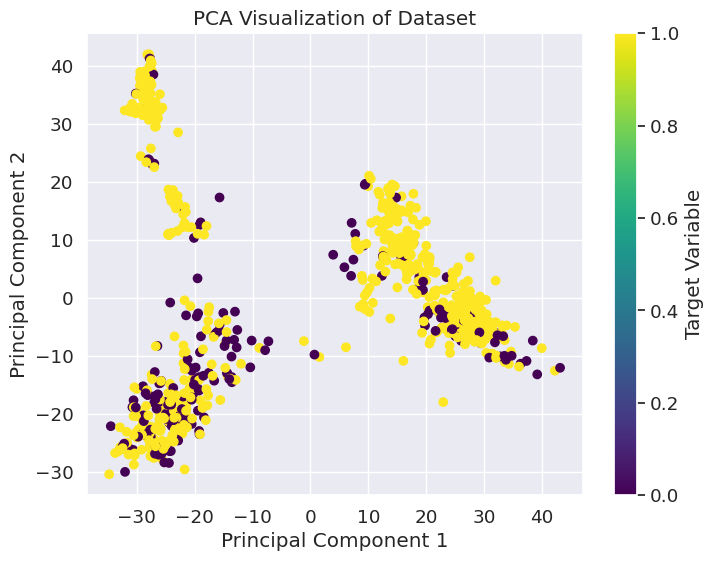

In [85]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)  # You can adjust the number of components as needed
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # Replace 'c=y' with 'c=None' if no target variable is available
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Dataset')
plt.colorbar(label='Target Variable')  # Replace 'Target Variable' with the name of your target variable if applicable
plt.grid(True)
plt.show()